In [1]:
from img_doc.document import Document
from img_doc.document.extractors.dataset_extractors import dataset2json
from img_doc.document.extractors import TsPubLayNetExtractor
from img_doc.document.data_structures.page.extractors.block_extractors import BaseRandomWalkClassificator

In [2]:
dataset_ext = TsPubLayNetExtractor()

In [12]:
rnd_cls = BaseRandomWalkClassificator(properties=["many_dist", "many_angle"],count_step=50)

def doc2vecs(doc: Document):
    x = []
    y = []
    for page in doc.pages:
        for block in page.blocks:
            x.append(rnd_cls.get_words_vec(block.words).tolist())
            y.append(block.label)
    return x, y

In [13]:
dataset2json("rez.json", "/home/daniil/program/dataset/mini_ts_publaynet/", dataset_ext, doc2vecs)

ERROR: /home/daniil/program/dataset/mini_ts_publaynet/train/PMC5148785_00000.jpg
ERROR: /home/daniil/program/dataset/mini_ts_publaynet/train/PMC5148787_00000.jpg
ERROR: /home/daniil/program/dataset/mini_ts_publaynet/train/PMC3671139_00002.jpg
ERROR: /home/daniil/program/dataset/mini_ts_publaynet/train/PMC3016243_00010.jpg
ERROR: /home/daniil/program/dataset/mini_ts_publaynet/train/PMC5215253_00000.jpg
ERROR: /home/daniil/program/dataset/mini_ts_publaynet/train/PMC5640724_00000.jpg
ERROR: /home/daniil/program/dataset/mini_ts_publaynet/train/PMC5263190_00000.jpg
ERROR: /home/daniil/program/dataset/mini_ts_publaynet/train/PMC5640740_00002.jpg
ERROR: /home/daniil/program/dataset/mini_ts_publaynet/train/PMC6060773_00002.jpg
ERROR: /home/daniil/program/dataset/mini_ts_publaynet/train/PMC5462463_00023.jpg
ERROR: /home/daniil/program/dataset/mini_ts_publaynet/train/PMC4712356_00003.jpg
ERROR: /home/daniil/program/dataset/mini_ts_publaynet/train/PMC5760672_00005.jpg
ERROR: /home/daniil/program/

In [12]:
# docs = dataset_ext.dataset_extractor("/home/daniil/program/dataset/mini_ts_publaynet/")

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7fefb0488820>>
Traceback (most recent call last):
  File "/home/daniil/program/python/project/layout_highlighter/imgDoc/env/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 770, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


In [6]:
doc = Document()

In [7]:
doc.set_from_path("/home/daniil/program/dataset/mini_ts_publaynet/train/PMC5148785_00000.jpg")

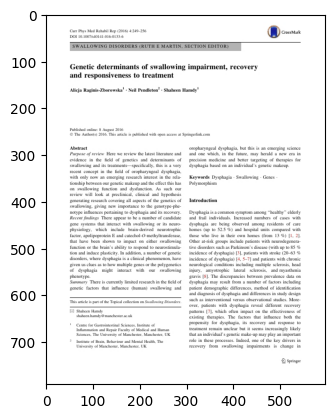

In [8]:
doc.pages[0].image.plot()

In [16]:
import json
name_model = "rez.json"
with open("rez.json", "r") as f:
    dataset = json.load(f)

In [32]:
print("Первый x:\n", dataset["x"][0])
print("Последний, x:\n", dataset["x"][-1])
print("Размер x:\t", len(dataset["x"][0]))
print("Первый y:\t", dataset["y"][0])
print("Последний y:\t", dataset["y"][0])
print("Кол-во записей:\t", len(dataset["x"]))

Первый x:
 [27.65863337187866, 27.65863337187866, 4.0, 3.0, 0.0, 0.0, 0.5734623443633283, 1.0, 27.65863337187866, 27.65863337187866, 4.0, 3.0, 0.0, 0.0, 0.5734623443633283, 1.0, 27.65863337187866, 27.65863337187866, 4.0, 3.0, 0.0, 0.0, 0.5734623443633283, 1.0, 27.65863337187866, 27.65863337187866, 4.0, 3.0, 0.0, 0.0, 0.5734623443633283, 1.0, 27.65863337187866, 27.65863337187866, 4.0, 3.0, 0.0, 0.0, 0.5734623443633283, 1.0, 27.65863337187866, 27.65863337187866, 4.0, 3.0, 0.0, 0.0, 0.5734623443633283, 1.0, 27.65863337187866, 27.65863337187866, 4.0, 3.0, 0.0, 0.0, 0.5734623443633283, 1.0, 27.65863337187866, 27.65863337187866, 4.0, 3.0, 0.0, 0.0, 0.5734623443633283, 1.0, 27.65863337187866, 27.65863337187866, 4.0, 3.0, 0.0, 0.0, 0.5734623443633283, 1.0, 27.65863337187866, 27.65863337187866, 4.0, 3.0, 0.0, 0.0, 0.5734623443633283, 1.0, 27.65863337187866, 27.65863337187866, 4.0, 3.0, 0.0, 0.0, 0.5734623443633283, 1.0, 27.65863337187866, 27.65863337187866, 4.0, 3.0, 0.0, 0.0, 0.573462344363328

In [37]:
import numpy as np
keys = np.unique(dataset["y"])
y = np.array(dataset["y"])
for key in keys:
    print(key, ":", len(y[y == key]))


0 : 2347
1 : 51041
2 : 13703
3 : 982
4 : 2644
